---
# Esercitazione 6
---

## Modello di Ising 1D
Questa esercitazione è incentrata sul riprodurre il modello di Ising 1D, un modello che sfrutta le interazioni tra spin vicini in un reticolo per descrivere il fenomeno della magnetizzazione. Il caso in 1D e 2D, a differenza di quello 3D, è risolvibile analiticamente. In unità di $k_B=1$ e $\mu_B = 1$, l'hamiltoniana di un sistema di N spin interagenti è la seguente:

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

dove $\{ s_i \}_{i=1,N}$ sono variabili di spin che assumono i valori $\{-1;+1\}$ e $J$ è una costante di accoppiamento tra spin (se $J>0$ corrisponde a un modello ferromagnetico, in quanto favorisce spin allineati). Si considerano le condizioni periodiche al bordo ($s_{N+1} = s_{1}$) e un'interazione tra spin vicini (si influenzano solo gli spin immediatamente adiacenti). Si noti che nel caso 1D con spin $1/2$ il numero di configurazioni possibili del sistema è $2^N$ (con N numero di spin), data la dicotomia della variabile.

Per questa esercitazione verranno implementati due algoritmi per simulare il modello di Ising 1D: l'algoritmo di Metropolis e di Gibbs. Il primo algoritmo è già stato descritto nell'esercitazione $5$, si procede dunque a descrivere come viene implementato per questo modello e a descrivere il funzionamento del secondo algoritmo.

### Algoritmo di Metropolis
Sia $\mu$ una specifica configurazione di spin del reticolo 1D. Come prima fase dell'algoritmo, si seleziona casualmente uno tra i suoi spin. Questa fase corrisponde alla scelta della funzione di transizione $T(\mu, \nu)$, infatti manda il sistema da una configurazione a un'altra. La configurazione $\nu$ corrisponde a quella in cui lo spin selezionato è invertito; questo spin viene girato se quest'azione abbassa l'energia del sistema, altrimenti la scelta è casuale. La probabilità di accettazione della "mossa" è il peso di Boltzmann e viene calcolata come segue:

$$
A(\nu|\mu) = \text{min}\left[1,e^{-\beta (E_\nu-E_\mu)}\right]
$$

dove $\beta = 1/k_B T$ e l'esponenziale è dato dal rapporto tra le probabilità associate alle due configurazioni del sistema, quella di partenza $\mu$ e quella da scegliere $\nu$. Si noti che grazie al rapporto tra le probabilità la normalizzazione si semplifica. $\\$
Data l'Hamiltoniana del modello, considerando di girare lo spin $k$-esimo la differenza di energia è:

$$
E_\nu-E_\mu = -J \sum_{\langle ij \rangle} s_i^\nu s_j^\nu + J \sum_{\langle ij \rangle} s_i^\mu s_j^\mu = ... = 
$$
$$
= -J \sum_{i \text{ vicino a } k} s_i^\mu \left(s_k^\nu-s_k^\mu \right) = 2 J s_k^\mu \sum_{i \text{ vicino a } k} s_i^\mu = 2 J s_k^\mu (s_{k-1}^\mu + s_{k+1}^\mu)
$$

dove con $\langle ij \rangle$ si intende somma su spin vicini. Come aspettato, si nota che il cambiamento in energia è dovuto al solo spin girato (e dai suoi vicini). $\\$
A questo punto si procede come fatto per l'esercitazione $5$: viene estratto un numero casuale $r \in [0,1]$ e se $r < A$ viene accettata la proposta di flip, altrimenti si mantiene la configurazione precedente. Questa procedura viene poi reiterata fino a che il sistema non si stabilizza. Si noti che in questo problema la temperatura è fissata fin da subito.

### Algoritmo di Gibbs
L'algoritmo di Gibbs (anche conosciuto come "Algoritmo del bagno termico") può essere pensato come un caso particolare di algoritmo di Metropolis, in cui l'accettazione è 1 e in cui la probabilità di transizione è particolare. In questo algoritmo, infatti, si campiona la distribuzione condizionale, ed essa può essere vista come una probabilità di transizione. Per il modello di Ising questa probabilità è:

$$
P(s_k= \pm 1 | {s_j: j \neq k}) = ... =  \left( 1 + \exp \left(-\beta\Delta E \right) \right)^{-1}
$$

e rappresenta la probabilità che lo spin $s_k$ sia $\pm 1$, sapendo la configurazione di tutti gli altri spin a meno di quello ($s_j: j \neq k$) e conoscendo la variazione di energia data invertendo quello spin (ad es. se $s_k=+1$ $\Delta E$ è la variazione di energia tra il sistema con $s_k=+1$ e $s_k=-1$ e viceversa). La presenza della variazione di energia a esponente e a denominatore garantisce che sia favorito l'allineamento dello spin $s_k$ a quelli vicini. $\\$
Complessivamente quindi, viene estratto uno spin casuale iniziale e, indipendentemente dal suo valore attuale, viene generato un suo nuovo stato a partire dalla probabilità sopra riportata. Calcolando ad esempio la probabilità $A$ che $s_k$ sia $+1$, si estrae un numero casuale $r \in [0,1]$. Se $r < A$ si setta lo spin ad up, altrimenti a down.

## Esercizio 06.1 - Modello di Ising 1D
In questo primo punto, utilizzando entrambi gli algoritmi a confronto verranno calcolate:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

in funzione della temperatura $T$, nel range $\left[0.5;2.0\right]$, per un sistema di $N=50$ spin con costante di interazione tra spin $J=1$.

I risultati ottenuti utilizzando i due algoritmi vengono confrontati con le rispettive curve analitiche.

### Equilibrazione
Prima di svolgere l'analisi, è necessario verificare il numero di step necessari per raggiungere l'equilibrio. Per fare ciò vengono mostrati, per entrambi gli algoritmi, i risultati dell'energia totale del sistema al variare degli step MC, ottenuti con le seguenti condizioni: $T=2$, $h=0$, raggiungendo un totale di $2000$ step e a partire da una configurazione casuale del sistema $\\$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# carico l'energia misurata nei due algoritmi
E_metro = np.loadtxt("./dati/Metropolis/Equilibration.dat", unpack= True, usecols=(0), skiprows=0)
E_gibbs = np.loadtxt("./dati/Gibbs/Equilibration.dat", unpack= True, usecols=(0), skiprows=0)

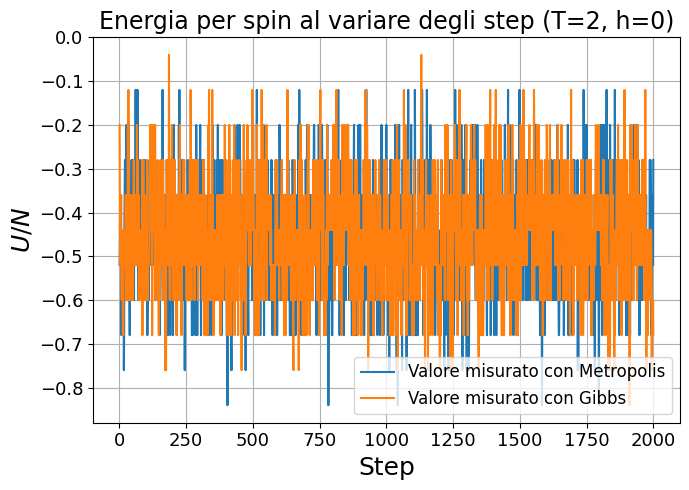

In [5]:
N = len(E_metro)        # numero di step per Metropolis e Gibbs
x = np.arange(1, N+1)   # x del grafico, numero di step: [1,2,...,Nstep]

plt.figure(figsize=(7, 5))
plt.title(r"Energia per spin al variare degli step (T=2, h=0)",fontsize=17)

plt.plot(x[:2000], E_metro[:2000], label = "Valore misurato con Metropolis")
plt.plot(x[:2000], E_gibbs[:2000], label = "Valore misurato con Gibbs")

plt.xlabel(r"Step", fontsize=18)
plt.ylabel(r"$U/N$", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout()

plt.show()

Dal plot precedente, per entrambi gli algoritmi, è possibile constatare che il sistema raggiunge l'equilibrio da subito, infatti l'energia per spin oscilla sempre nello stesso range di valori. Per questo motivo verrà omessa la fase di equilibrazione, considerando anche che gli step utilizzati più avanti saranno ordini di grandezza superiori.

### Scelta del numero di blocchi
Il numero di blocchi appropriato da utilizzare viene stimato con il medoto del "block averaging". Plotto l'errore calcolato dal dataset dell'energia, al variare del numero di blocchi utilizzato e a numero di simulazioni fissate ($10^6$). Il numero di blocchi scelto è quello alla quale l'errore inizia a saturare.

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# carico l'errore dell'energia misurata nei due algoritmi al variare del numero di blocchi
Nblk, err_E_metro = np.loadtxt("./dati/Metropolis/Energy_Data_Over_Blocks.dat", unpack= True, usecols=(0,3), skiprows=0)
Nblk, err_E_gibbs = np.loadtxt("./dati/Gibbs/Energy_Data_Over_Blocks.dat", unpack= True, usecols=(0,3), skiprows=0)

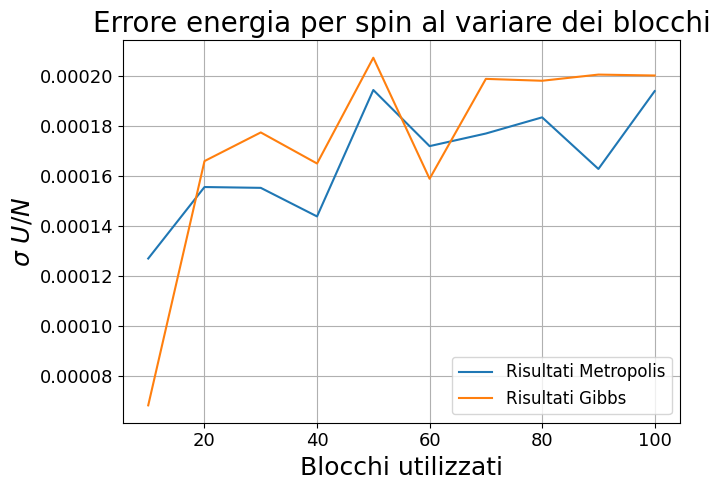

In [7]:
plt.figure(figsize=(7, 5))
plt.title(r"Errore energia per spin al variare dei blocchi",fontsize=20)

plt.plot(Nblk, err_E_metro, label = "Risultati Metropolis")
plt.plot(Nblk, err_E_gibbs, label = "Risultati Gibbs")

plt.xlabel(r"Blocchi utilizzati", fontsize=18)
plt.ylabel(r"$\sigma$ $U/N$", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

# plt.ylim(-0.463, -0.461)

plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout()

plt.show()

Si può notare che l'errore sull'energia inizia a saturare verso $50$ blocchi utilizzati, pertanto verrà usata questa divisione, che garantisce la non correlazione tra i valori del dataset. $\\$
Di seguito vengono riportati i risultati delle grandezze termodinamiche citati all'inizio, in funzione della temperatura $T$ nel range $\left[0.5;2.0\right]$ e utilizzando $2\cdot 10^5$ step per ognuno dei $50$ blocchi.

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# carico i risultai ottenuti e relativo errore dalle due metodologie e la temperatura 
eneM, err_eneM, T  = np.loadtxt("./dati/Metropolis/output.ene.0", usecols=(2,3,4), unpack = 'true')
heatM, err_heatM   = np.loadtxt("./dati/Metropolis/output.heat.0", usecols=(2,3), unpack = 'true')
magM, err_magM     = np.loadtxt("./dati/Metropolis/output.mag.0", usecols=(2,3), unpack = 'true')
chiM, err_chiM     = np.loadtxt("./dati/Metropolis/output.chi.0", usecols=(2,3), unpack = 'true')

eneG, err_eneG   = np.loadtxt("./dati/Gibbs/output.ene.0", usecols=(2,3), unpack = 'true')
heatG, err_heatG = np.loadtxt("./dati/Gibbs/output.heat.0", usecols=(2,3), unpack = 'true')
magG, err_magG   = np.loadtxt("./dati/Gibbs/output.mag.0", usecols=(2,3), unpack = 'true')
chiG, err_chiG   = np.loadtxt("./dati/Gibbs/output.chi.0", usecols=(2,3), unpack = 'true')

# Calcolo i valori analitici
Te = np.linspace(T[0], T[-1], num=100) # temperatura per i grafici analitici
b = 1/Te # beta
J = 1.0
Ns = 50 # numero di spin
th = np.tanh(J/Te)
thN= th**Ns
ch = 1/th

e = -J*( th + ch*thN )/( 1 + thN ) # U/N con h=0
c =((b*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2) # Capacità termica con h=0

# ora calcolo la magnetizzazione analitica con h=0.02
h=0.02 # campo magnetico esterno
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

X = b*np.exp(2*b*J)*(1-thN)/(1+thN) # suscettibilità magnetica con h=0


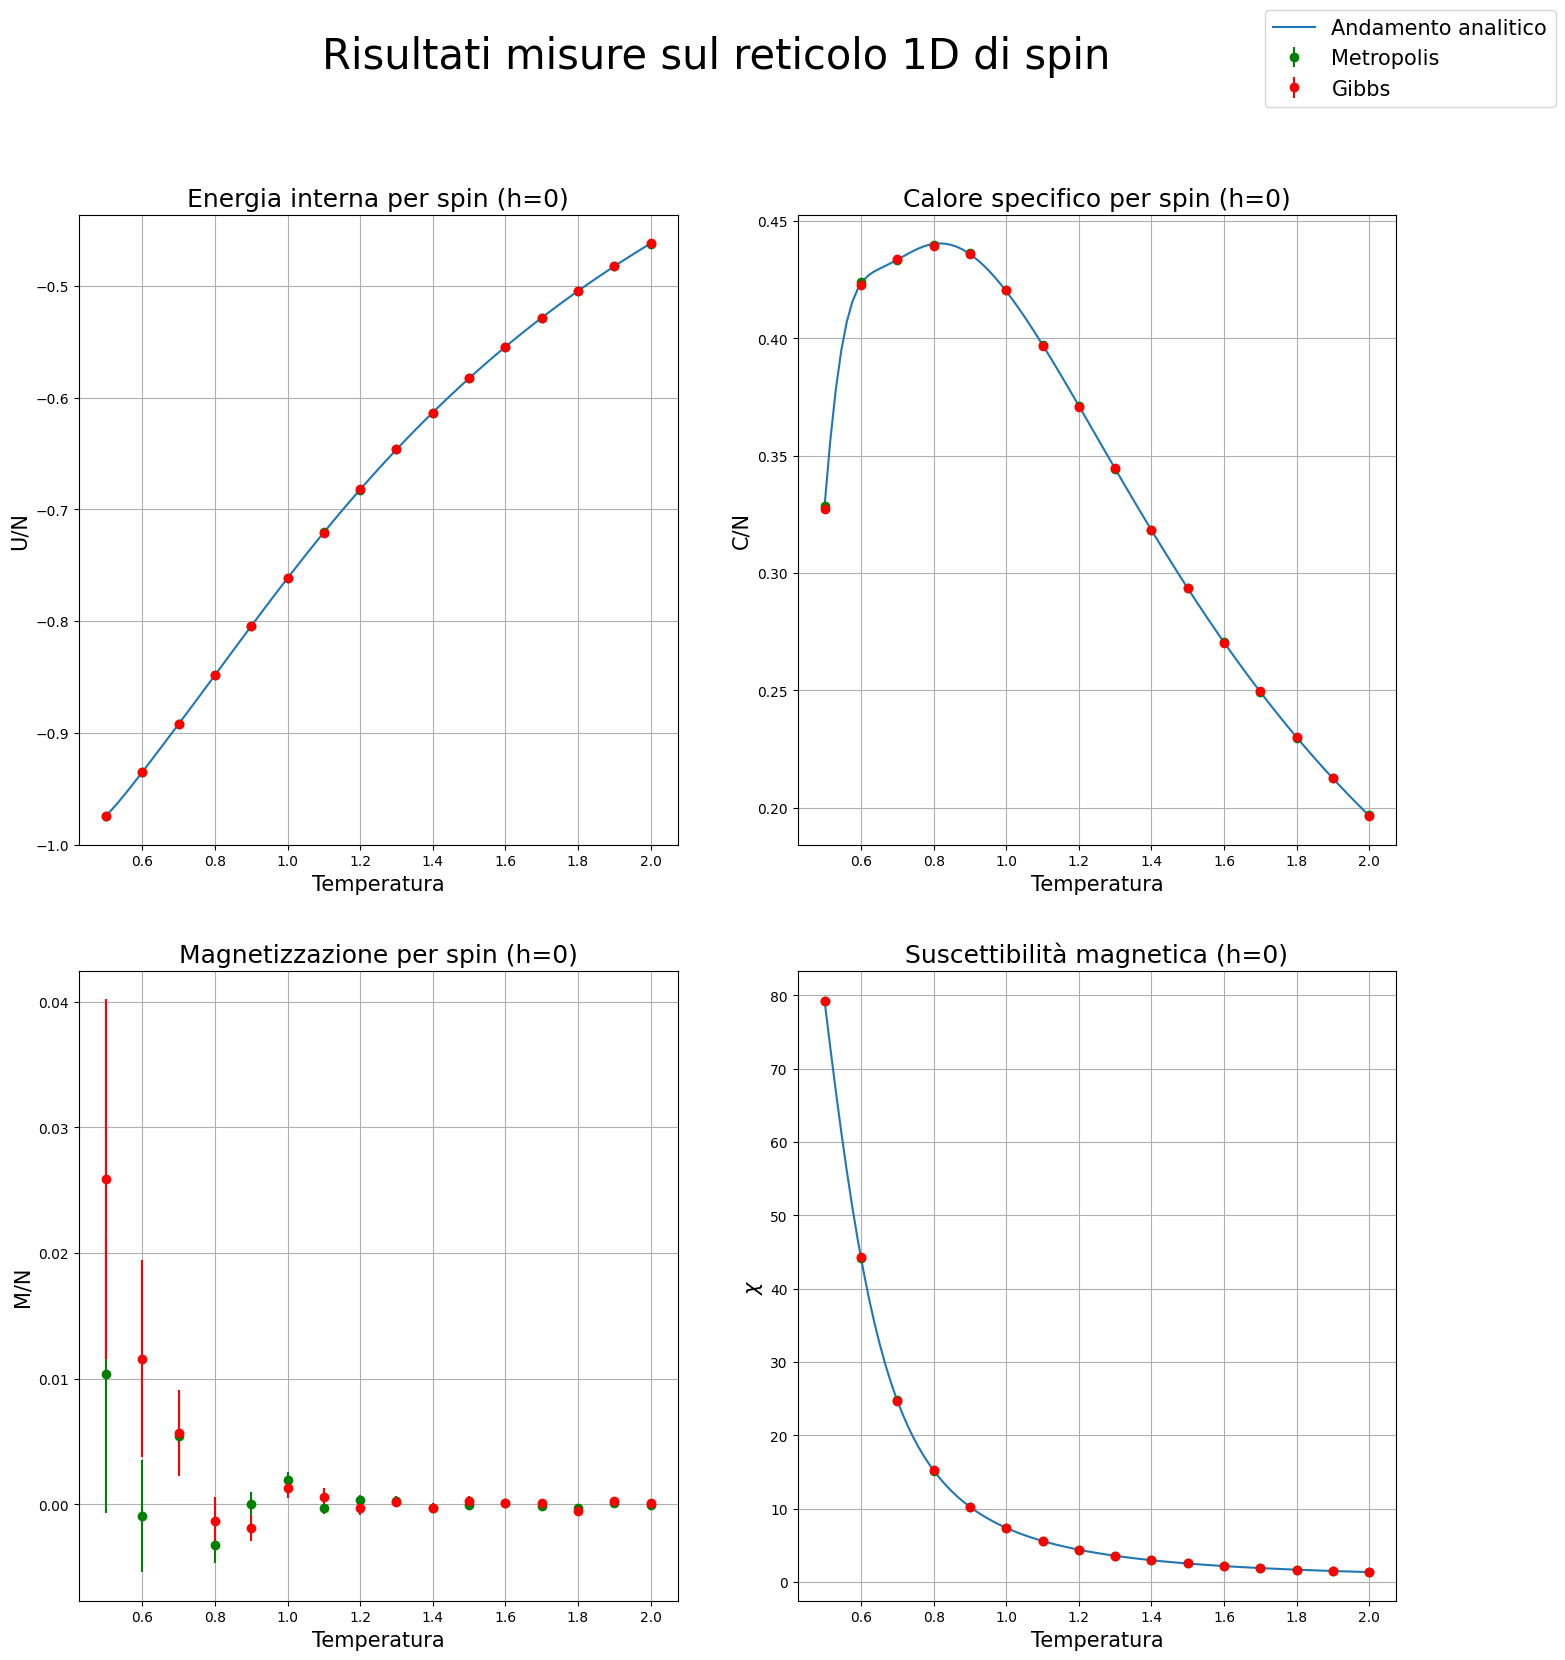

In [9]:
fig, axs = plt.subplots(2,2, figsize = (17,18))
fig.suptitle("Risultati misure sul reticolo 1D di spin", fontsize = (30))

plt.subplot(2,2,1)
plt.errorbar(T, eneM, yerr=err_eneM, fmt='go', label = "Metropolis")
plt.errorbar(T, eneG, yerr=err_eneG, fmt='ro', label = "Gibbs")
plt.plot(Te, e, label = "Andamento analitico" )
plt.title("Energia interna per spin (h=0)", fontsize=18)
plt.xlabel("Temperatura", fontsize = 15)
plt.ylabel("U/N", fontsize = 15)
plt.grid(True)


plt.subplot(2,2,2)
plt.errorbar(T, heatM, yerr=err_heatM, fmt='go')
plt.errorbar(T, heatG, yerr=err_heatG, fmt='ro')
plt.plot(Te, c)
plt.title("Calore specifico per spin (h=0)", fontsize=18)
plt.xlabel("Temperatura", fontsize = 15)
plt.ylabel("C/N", fontsize = 15)
plt.grid(True)


plt.subplot(2,2,3)
plt.errorbar(T, magM, yerr=err_magM, fmt='go')
plt.errorbar(T, magG, yerr=err_magG, fmt='ro')
# plt.plot(Te, M, label = "Andamento analitico" )
plt.title("Magnetizzazione per spin (h=0)", fontsize=18)
plt.xlabel("Temperatura", fontsize = 15)
plt.ylabel("M/N", fontsize = 15)
plt.grid(True)

plt.subplot(2,2,4)
plt.errorbar(T, chiM, yerr=err_chiM, fmt='go')
plt.errorbar(T, chiG, yerr=err_chiG, fmt='ro')
plt.plot(Te, X)
plt.title("Suscettibilità magnetica (h=0)", fontsize=18)
plt.xlabel("Temperatura", fontsize = 15)
plt.ylabel("$\chi$", fontsize = 15)
plt.grid(True)

fig.legend(fontsize = 15)

plt.show()

Le misure di energia, capacità termica e suscettibilità magnetica seguono l'andamento analitico previsto, confermando la riuscita dell'analisi. Per quanto riguarda la magnetizzazione, come aspettato, si può notare che essa tende a zero per valori di temperatura sufficientemente elevati (paramagnetismo), mentre il sistema è ferromagnetico per temperature inferiori. 

Di seguito vengono ora mostrati i risultati della magnetizzazione in presenza di campo esterno, ottenuti con i due algirimti.

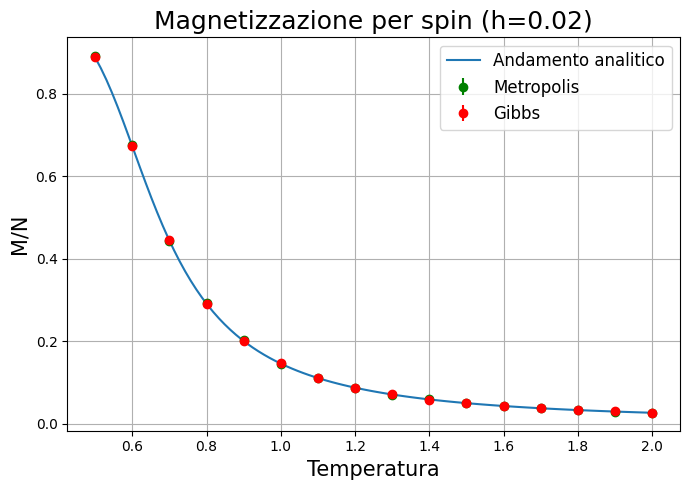

In [10]:
magM_h, err_magM_h   = np.loadtxt("./dati/Metropolis/output.mag_h.0", usecols=(2,3), unpack = 'true')
magG_h, err_magG_h   = np.loadtxt("./dati/Gibbs/output.mag_h.0", usecols=(2,3), unpack = 'true')

plt.figure(figsize=(7, 5))
plt.title("Magnetizzazione per spin (h=0.02)", fontsize=18)
plt.errorbar(T, magM_h, yerr=err_magM_h, fmt='go', label = "Metropolis")
plt.errorbar(T, magG_h, yerr=err_magG_h, fmt='ro', label = "Gibbs")
plt.plot(Te, M, label = "Andamento analitico" )
plt.xlabel("Temperatura", fontsize = 15)
plt.ylabel("M/N", fontsize = 15)
plt.grid(True)

plt.legend(loc='upper right', prop={'size': 12})

plt.grid(True)
plt.tight_layout()

plt.show()

Anche in questo caso si conferma il corretto andamento misurato, compatibile con quanto calcolato analiticamente, utilizzando entrambi i metodi computazionali.

## Modello di Ising 2D
Nel file "Ising_2D.py" è presente l'implementazione del modello di Ising in due dimensioni, con relativa animazione, mostrata di seguito.<br>
Il caso riportato rappresenta un reticolo $100 \times 100$ spin, in cui i quadrati bianchi e neri rappresentano spin up e down rispettivamente.<br>
La temperatura impostata è $0.02$ in unità ridotte, con $J=1$ (modello ferromagnetico).<br>
Il sistema viene fatto evolvere da una configurazione iniziale casuale. Vengono poi mostrati $60$ frame al secondo per $10$ secondi, in cui ad ogni frame il sistema evolve di $20$ step. La bassa temperatura impostata comporta il formarsi di regioni di spin allineati nella stessa direzione. $\\$
Si noti che la configurazione del reticolo in cui tutti gli spin sono in posizione casuale corrisponde a temperatura "infinita"; al ridursi della temperatura ci si avvicina al ground state del sistema, notando che ne esistono due: uno con tutti gli spin up e uno con tutti down, essi corrispondono entrambi a $T=0$. Questo aspetto corrisponde al fatto che lo stato fondamentale non è simmetrico, mentre quello ad alta temperatura sì: c'è stata una rottura spontanea di simmetria del sistema. Il GS preferito in presenza di campo magnetico esterno è quello per cui gli spin sono allineati ad esso.

In [1]:
from IPython.display import Video

video_Ising_path = './Ising_2D/IsingModel.mp4'

Video(video_Ising_path)